<a href="https://colab.research.google.com/github/ADZRABARAKURA/Predicting_Diseases-pet-project/blob/Diabetes_Mellitus/PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import библиотек

In [9]:
import pandas as pd # Библиотека Pandas для работы с табличными данными
import numpy as np # библиотека Numpy для операций линейной алгебры и прочего
import matplotlib.pyplot as plt # библиотека Matplotlib для визуализации
import seaborn as sns # библиотека seaborn для визуализации
import numpy as np # библиотека Numpy для операций линейной алгебры и прочего

# предварительная обработка числовых признаков
from sklearn.preprocessing import MinMaxScaler# Импортируем нормализацию от scikit-learn
from sklearn.preprocessing import StandardScaler # Импортируем стандартизацию от scikit-learn
from sklearn.preprocessing import PowerTransformer  # Степенное преобразование от scikit-learn
# предварительная обработка категориальных признаков
from sklearn.preprocessing import OneHotEncoder# Импортируем One-Hot Encoding от scikit-learn
from sklearn.preprocessing import OrdinalEncoder# Импортируем Порядковое кодированиеот scikit-learn

from sklearn.pipeline import Pipeline # Pipeline.Не добавить, не убавить

from sklearn.compose import ColumnTransformer # т.н. преобразователь колонок

from sklearn.base import BaseEstimator, TransformerMixin # для создания собственных преобразователей / трансформеров данных

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
import pandas as pd # Библиотека Pandas для работы с табличными данными
import numpy as np # библиотека Numpy для операций линейной алгебры и прочего
import matplotlib.pyplot as plt # библиотека Matplotlib для визуализации
import seaborn as sns # библиотека seaborn для визуализации
import numpy as np # библиотека Numpy для операций линейной алгебры и прочего

import plotly.graph_objects as go # Библиотека Plotly. Модуль "Graph Objects"
import plotly.express as px # Библиотека Plotly. Модуль "Express"

# предварительная обработка числовых признаков
from sklearn.preprocessing import MinMaxScaler# Импортируем нормализацию от scikit-learn
from sklearn.preprocessing import StandardScaler # Импортируем стандартизацию от scikit-learn
from sklearn.preprocessing import PowerTransformer  # Степенное преобразование от scikit-learn
# предварительная обработка категориальных признаков
from sklearn.preprocessing import OneHotEncoder# Импортируем One-Hot Encoding от scikit-learn
from sklearn.preprocessing import OrdinalEncoder# Импортируем Порядковое кодированиеот scikit-learn
from sklearn.preprocessing import LabelEncoder# Импортируем LabelEncoder от scikit-learn

from sklearn.pipeline import Pipeline # Pipeline.Не добавить, не убавить

from sklearn.compose import ColumnTransformer # т.н. преобразователь колонок

from sklearn.base import BaseEstimator, TransformerMixin # для создания собственных преобразователей / трансформеров данных

# Работа с данными

In [13]:
url = "https://github.com/ADZRABARAKURA/Predicting_Diseases-pet-project/raw/Diabetes_Mellitus/diabetes2.csv"
DF=pd.read_csv(url ,delimiter=',')

Данные были собраны у иракского общества, они были получены из лаборатории городской больницы и Специализированного центра эндокринологии и диабета, клинической больницы Аль-Кинди.


---


Датасет состоит из:

Gender - пол (F/M)

AGE - возраст (от 20 до 79)

Urea - мочевина

Cr - коэффициент креатина

HbA1c - Гликированный гемоглобин

Chol - холестерин

TG - триглецириды

HDL - липопротеиды высокой плотности(лпвп)

LDL - липопротеиды низкой плотности(лпнп)

VLDL - липопротеины очень низкой плотности(лпонп)

BMI - индекс массы тела (ИМТ = вес в кг /(рост в м)^2 )

CLASS - Y=Diabetic,N= Non-Diabetic






In [14]:
DF

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...
942,M,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,Y
943,M,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,Y
944,M,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,Y
945,M,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,Y


### Посчитаем число численных и категориальных колонок

In [15]:
cat_columns = []
num_columns = []

for column_name in DF.columns:
    if (DF[column_name].dtypes == object):
        cat_columns +=[column_name]
    else:
        num_columns +=[column_name]

print('categorical columns:\t ',cat_columns, '\n len = ',len(cat_columns))

print('numerical columns:\t ',  num_columns, '\n len = ',len(num_columns))



categorical columns:	  ['Gender', 'CLASS'] 
 len =  2
numerical columns:	  ['AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI'] 
 len =  10


# Предварительная обработка числовых признаков

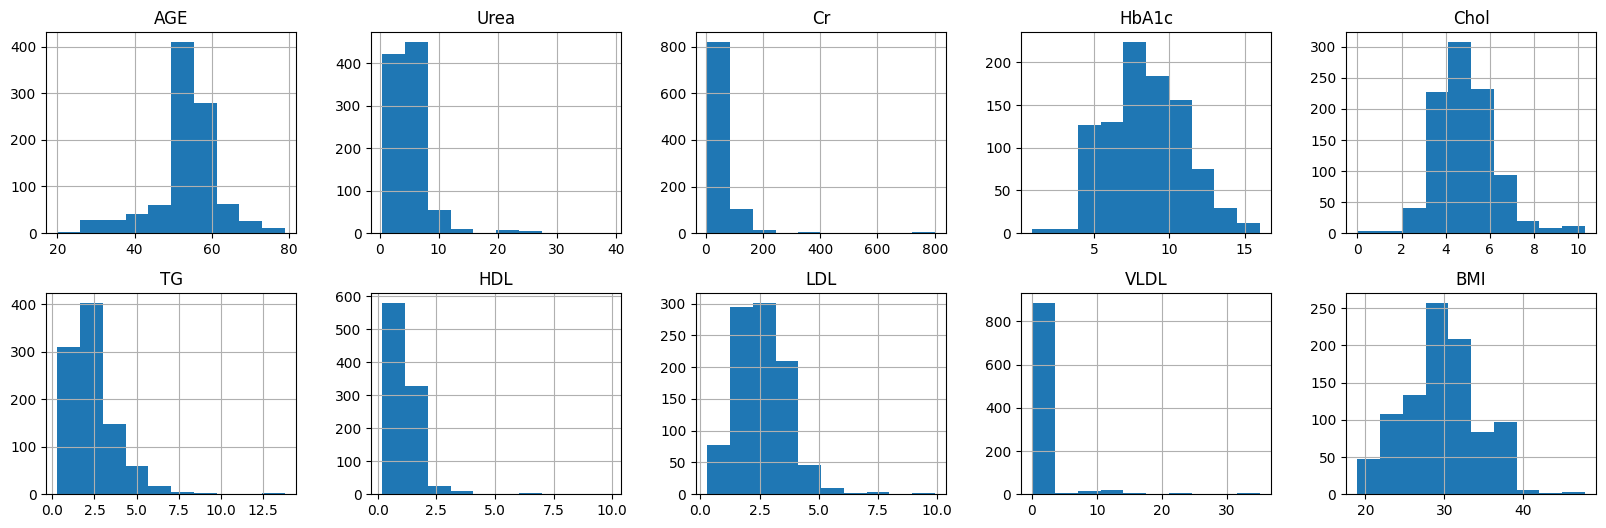

In [16]:
fig, axs = plt.subplots(2,5,figsize=(20,  6))

DF.hist(column = num_columns, ax = axs );

Делаем вывод о том, что `AGE`, `HbA1c`, `Chol`, `LDL` и `BMI` условно нормальные, их можно просто нормировать / стандартизировать

`Urea`,`Cr`, `TG`, `HDL`, `VLDL` лучше нелинейно преобразовывать

## Стандартизация

### **Первый шаг**

создаем объект `StandardScaler()` и "обучаем" его `.fit`

Где мы сохраняем среднее значение (`mean_`) и стандартное отклонение (`scale_`) исходного набора данных

Это полезно, так как вы можете использовать те же значения для других данных в будущем

In [17]:
scale = StandardScaler()

scale.fit(DF[num_columns]);

### **Шаг второй**

применяем трансформацию `.transform`

И пакуем результат в Dataframe

In [18]:
scaled = scale.transform(DF[num_columns])
df_standard = pd.DataFrame(scaled, columns= num_columns)
df_standard

,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
0,-0.482791,-0.154391,-0.379799,-1.379880,-0.517034,-1.032174,1.772020,-1.079509,-0.373762,-1.210922
1,-3.307942,-0.221653,-0.116774,-1.379880,-0.897939,-0.679198,-0.162307,-0.458236,-0.347131,-1.416375
2,-0.482791,-0.154391,-0.379799,-1.379880,-0.517034,-1.032174,1.772020,-1.079509,-0.373762,-1.210922
3,-0.482791,-0.154391,-0.379799,-1.379880,-0.517034,-1.032174,1.772020,-1.079509,-0.373762,-1.210922
4,-2.483939,0.652752,-0.379799,-1.379880,0.016234,-0.961579,-0.608690,-0.546989,-0.400392,-1.827283
...,...,...,...,...,...,...,...,...,...,...
942,1.989215,1.964358,0.458592,-0.553985,1.996942,-0.467412,-0.013512,-0.724496,-0.347131,0.021799
943,-2.719369,-0.726117,-0.149653,1.530416,-0.593215,-0.114436,-0.757485,-0.191977,3.594252,1.501065
944,-2.837083,0.652752,0.195567,-0.671970,-0.593215,-0.890983,-0.013512,-0.191977,1.650192,-0.512380
945,-1.895366,0.215549,-0.166092,-0.671970,0.320958,-0.255626,0.581665,0.251789,3.221419,2.179062


### **Шаг второй**

применяем трансформацию `.transform`

И пакуем результат в Dataframe

In [19]:
scaled = scale.transform(DF[num_columns])
df_standard = pd.DataFrame(scaled, columns= num_columns)
df_standard

,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
0,-0.482791,-0.154391,-0.379799,-1.379880,-0.517034,-1.032174,1.772020,-1.079509,-0.373762,-1.210922
1,-3.307942,-0.221653,-0.116774,-1.379880,-0.897939,-0.679198,-0.162307,-0.458236,-0.347131,-1.416375
2,-0.482791,-0.154391,-0.379799,-1.379880,-0.517034,-1.032174,1.772020,-1.079509,-0.373762,-1.210922
3,-0.482791,-0.154391,-0.379799,-1.379880,-0.517034,-1.032174,1.772020,-1.079509,-0.373762,-1.210922
4,-2.483939,0.652752,-0.379799,-1.379880,0.016234,-0.961579,-0.608690,-0.546989,-0.400392,-1.827283
...,...,...,...,...,...,...,...,...,...,...
942,1.989215,1.964358,0.458592,-0.553985,1.996942,-0.467412,-0.013512,-0.724496,-0.347131,0.021799
943,-2.719369,-0.726117,-0.149653,1.530416,-0.593215,-0.114436,-0.757485,-0.191977,3.594252,1.501065
944,-2.837083,0.652752,0.195567,-0.671970,-0.593215,-0.890983,-0.013512,-0.191977,1.650192,-0.512380
945,-1.895366,0.215549,-0.166092,-0.671970,0.320958,-0.255626,0.581665,0.251789,3.221419,2.179062


Визуализируем

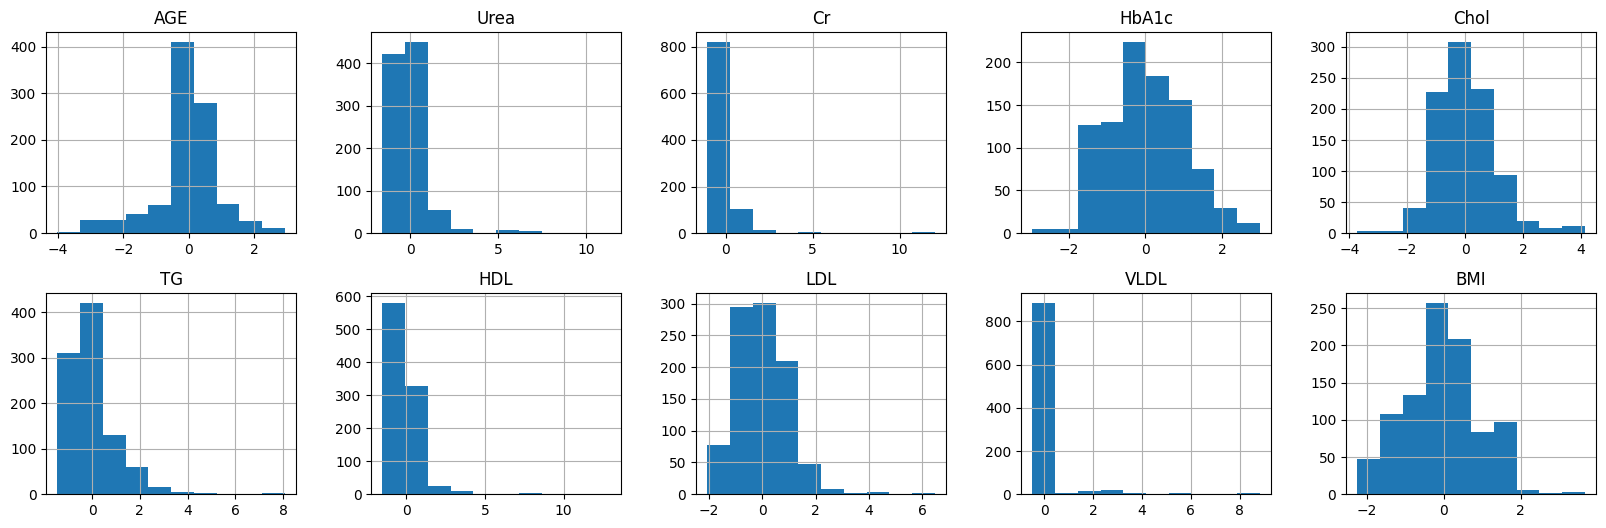

In [20]:
df_standard.hist(figsize = (20,6), layout= (2,5));

## Нормализация

### **Первый шаг**

создаем объект `MinMaxScaler()` и "обучаем" его `.fit`

Где мы сохраняем максимальное (`data_max_`) и минимальное (`data_min_`) исходного набора данных

Это полезно, так как вы можете использовать те же значения для других данных в будущем

In [21]:
norm = MinMaxScaler()

norm.fit(DF[num_columns]);

### **Шаг второй**

применяем трансформацию `.transform`

И пакуем результат в Dataframe

In [22]:
normolized = norm.transform(DF[num_columns])
df_norm = pd.DataFrame(normolized, columns= num_columns)
df_norm

,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
0,0.508475,0.109375,0.050378,0.264901,0.407767,0.044444,0.226804,0.114583,0.011461,0.173913
1,0.101695,0.104167,0.070529,0.264901,0.359223,0.081481,0.092784,0.187500,0.014327,0.139130
2,0.508475,0.109375,0.050378,0.264901,0.407767,0.044444,0.226804,0.114583,0.011461,0.173913
3,0.508475,0.109375,0.050378,0.264901,0.407767,0.044444,0.226804,0.114583,0.011461,0.173913
4,0.220339,0.171875,0.050378,0.264901,0.475728,0.051852,0.061856,0.177083,0.008596,0.069565
...,...,...,...,...,...,...,...,...,...,...
942,0.864407,0.273438,0.114610,0.403974,0.728155,0.103704,0.103093,0.156250,0.014327,0.382609
943,0.186441,0.065104,0.068010,0.754967,0.398058,0.140741,0.051546,0.218750,0.438395,0.633043
944,0.169492,0.171875,0.094458,0.384106,0.398058,0.059259,0.103093,0.218750,0.229226,0.292174
945,0.305085,0.138021,0.066751,0.384106,0.514563,0.125926,0.144330,0.270833,0.398281,0.747826


Визуализируем

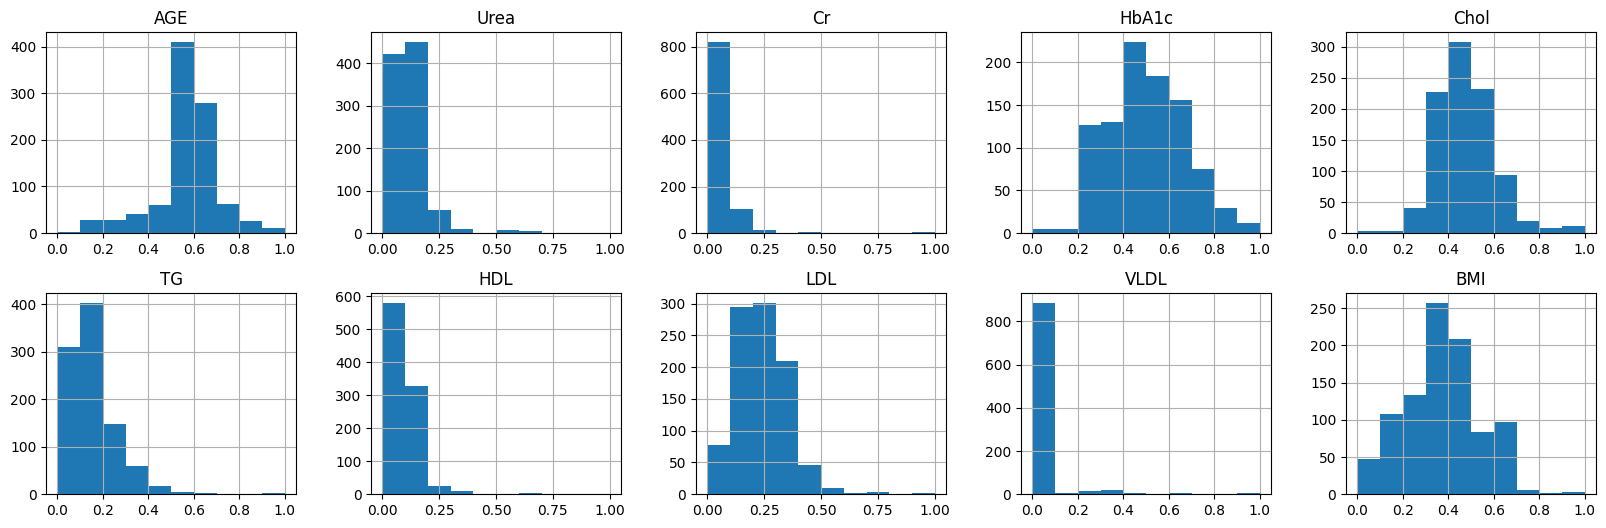

In [23]:
df_norm.hist(figsize = (20,6), layout= (2,5));

## Степенное преобразование

### **Первый шаг**

Создание Объекта `PowerTransformer()` и его "обучение" `.fit`


In [24]:
pt = PowerTransformer()

pt.fit(DF[num_columns]);

Коэффициенты степени преобразования

In [25]:
pt.lambdas_

array([ 2.27278311, -0.49666806, -0.3736495 ,  0.83349945,  0.57388543,
       -0.52471423, -1.66859446,  0.07901477, -1.47458223,  0.7564717 ])

### **Шаг второй**

применяем трансформацию `.transform`

И пакуем результат в Dataframe

In [26]:
power = pt.transform(DF[num_columns])
df_power = pd.DataFrame(power, columns= num_columns)
df_power

,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
0,-0.594397,0.074677,-0.634978,-1.400238,-0.483868,-1.535656,1.961696,-1.186187,-1.244712,-1.219593
1,-2.547765,-0.030917,0.124000,-1.400238,-0.894676,-0.721653,0.040436,-0.363335,-0.915681,-1.436529
2,-0.594397,0.074677,-0.634978,-1.400238,-0.483868,-1.535656,1.961696,-1.186187,-1.244712,-1.219593
3,-0.594397,0.074677,-0.634978,-1.400238,-0.483868,-1.535656,1.961696,-1.186187,-1.244712,-1.219593
4,-2.133072,1.019481,-0.634978,-1.400238,0.063976,-1.348285,-0.979635,-0.469689,-1.632864,-1.877162
...,...,...,...,...,...,...,...,...,...,...
942,2.445845,1.898164,1.122377,-0.535330,1.890564,-0.347570,0.300170,-0.692571,-0.915681,0.041084
943,-2.263960,-1.059971,0.044442,1.500440,-0.564635,0.152893,-1.429722,-0.062235,2.273263,1.477851
944,-2.325639,1.019481,0.739321,-0.656320,-0.564635,-1.174678,0.300170,-0.062235,2.125869,-0.497163
945,-1.760978,0.569711,0.003306,-0.656320,0.364586,-0.031980,1.082981,0.389063,2.258281,2.113805


Визуализируем

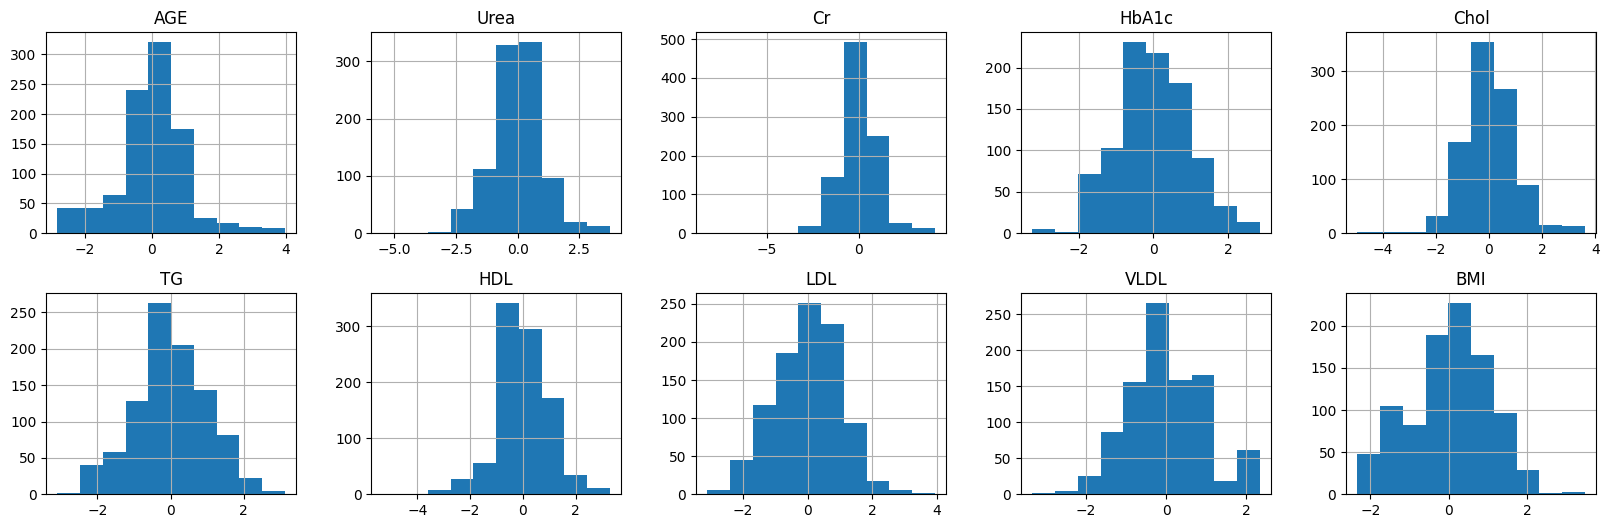

In [27]:
df_power.hist(figsize = (20,6), layout= (2,5));

# Предварительная обработка категориальных признаков

## Порядковое кодирование

### **Первый шаг**

Создание Объекта `OrdinalEncoder()` и его "обучение" `.fit`

In [28]:
ordinal = OrdinalEncoder()
ordinal.fit(DF[cat_columns]);

### **Шаг второй**

применяем трансформацию `.transform`

И пакуем результат в Dataframe

In [29]:
Ordinal_encoded = ordinal.transform(DF[cat_columns])
df_ordinal = pd.DataFrame(Ordinal_encoded, columns = cat_columns)
df_ordinal

,Gender,CLASS
0,0.0,0.0
1,1.0,0.0
2,0.0,0.0
3,0.0,0.0
4,1.0,0.0
...,...,...
942,1.0,1.0
943,1.0,1.0
944,1.0,1.0
945,1.0,1.0




# Модель


In [30]:
DF.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


age,chol, -standart

urea,cr,tg,hdl,ldl -power

hba1c,vldl,bmi -standart,power

gender,class -orfinal


In [31]:
num_pipe_age = Pipeline([
    ('scaler', StandardScaler())
])

num_age = ['AGE']

num_pipe_chol = Pipeline([
    ('scaler', StandardScaler())
])

num_chol = ['Chol']

num_pipe_urea = Pipeline([
    ('power', PowerTransformer())
])

num_urea = ['Urea']

num_pipe_cr = Pipeline([
    ('power', PowerTransformer())
])

num_cr = ['Cr']

num_pipe_tg = Pipeline([
    ('power', PowerTransformer())
])

num_tg = ['TG']

num_pipe_hdl = Pipeline([
    ('power', PowerTransformer())
])

num_hdl = ['HDL']

num_pipe_ldl = Pipeline([
    ('power', PowerTransformer())
])

num_ldl = ['LDL']

num_pipe_vldl = Pipeline([
    ('scaler', StandardScaler()),
    ('power', PowerTransformer())
])

num_vldl = ['VLDL']

num_pipe_hba1c = Pipeline([
    ('scaler', StandardScaler()),
    ('power', PowerTransformer())
])

num_hba1c = ['HbA1c']

num_pipe_bmi = Pipeline([
    ('scaler', StandardScaler()),
    ('power', PowerTransformer())
])

num_bmi = ['BMI']

cat_pipe_gender = Pipeline([
    ('encoder', OrdinalEncoder())

])
cat_gender = ['Gender']

cat_pipe_class = Pipeline([
    ('encoder', OrdinalEncoder())

])
cat_class = ['CLASS']


# Сделаем отдельно Pipeline с  признаками
preprocessors_num = ColumnTransformer(transformers=[
    ('cat_gender', cat_pipe_gender, cat_gender),
    ('num_age', num_pipe_age, num_age),
    ('num_chol', num_pipe_chol, num_chol),
    ('num_urea', num_pipe_urea, num_urea),
    ('num_cr', num_pipe_cr, num_cr),
    ('num_tg', num_pipe_tg, num_tg),
    ('num_hdl', num_pipe_hdl, num_hdl),
    ('num_ldl', num_pipe_ldl, num_ldl),
    ('num_vldl', num_pipe_vldl, num_vldl),
    ('num_hba1c', num_pipe_hba1c, num_hba1c),
    ('num_bmi', num_pipe_bmi, num_bmi),
    ])

# и Pipeline со всеми признаками
preprocessors_all = ColumnTransformer(transformers=[
    ('num_age', num_pipe_age, num_age),
    ('num_chol', num_pipe_chol, num_chol),
    ('num_urea', num_pipe_urea, num_urea),
    ('num_cr', num_pipe_cr, num_cr),
    ('num_tg', num_pipe_tg, num_tg),
    ('num_hdl', num_pipe_hdl, num_hdl),
    ('num_ldl', num_pipe_ldl, num_ldl),
    ('num_vldl', num_pipe_vldl, num_vldl),
    ('num_hba1c', num_pipe_hba1c, num_hba1c),
    ('num_bmi', num_pipe_bmi, num_bmi),
    ('cat_gender', cat_pipe_gender, cat_gender),
    ('cat_class', cat_pipe_class, cat_class),
])

In [32]:
# объединяем названия колонок в один список (важен порядок как в ColumnTransformer)
columns_all = np.hstack([num_age,
                    num_chol,
                    num_urea,
                    num_cr,
                    num_tg,
                    num_hdl,
                    num_ldl,
                    num_vldl,
                    num_hba1c,
                    num_bmi,
                    cat_gender])

In [33]:
DF['CLASS'].value_counts()

Y    844
N    103
Name: CLASS, dtype: int64

In [34]:
DF.groupby('CLASS').mean()

,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
CLASS,,,,,,,,,,
N,44.233010,4.680583,62.796117,4.560194,4.268932,1.625243,1.227184,2.625243,0.943689,22.374757
Y,55.305687,5.217468,69.873223,8.878270,4.953104,2.452026,1.206872,2.615213,2.020616,30.811517




# Модель1-C-Support Vector Classification


In [35]:
# separating the data and labels
X = DF.drop(columns = 'CLASS', axis=1)
Y = DF['CLASS']

In [36]:
Label = LabelEncoder()
Label.fit(Y) # задаем столбец, который хотим преобразовать
Label.classes_ # в аттрибуте .classes_ хранится информация "какой класс как шифруется"

array(['N', 'Y'], dtype=object)

In [37]:
y = Label.transform(Y) # преобразуем и сохраняем в новую переменную
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [38]:
print(X)
print(y)

    Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL   BMI
0        F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5  24.0
1        M   26   4.5  62    4.9   3.7  1.4  1.1  2.1   0.6  23.0
2        F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5  24.0
3        F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5  24.0
4        M   33   7.1  46    4.9   4.9  1.0  0.8  2.0   0.4  21.0
..     ...  ...   ...  ..    ...   ...  ...  ...  ...   ...   ...
942      M   71  11.0  97    7.0   7.5  1.7  1.2  1.8   0.6  30.0
943      M   31   3.0  60   12.3   4.1  2.2  0.7  2.4  15.4  37.2
944      M   30   7.1  81    6.7   4.1  1.1  1.2  2.4   8.1  27.4
945      M   38   5.8  59    6.7   5.3  2.0  1.6  2.9  14.0  40.5
946      M   54   5.0  67    6.9   3.8  1.7  1.1  3.0   0.7  33.0

[947 rows x 11 columns]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [39]:
from sklearn.linear_model import LogisticRegression # Логистичекая регрессия от scikit-learn

from sklearn.model_selection import train_test_split#  функция разбиения на тренировочную и тестовую выборку
# в исполнении scikit-learn

from sklearn.model_selection import StratifiedKFold # при кросс-валидации разбиваем данные в пропорции целевой метки
from sklearn.model_selection import cross_validate # функция кросс-валидации от Scikit-learn

from sklearn.metrics import f1_score # f1-мера от Scikit-learn
from sklearn.metrics import classification_report # функция scikit-learn которая считает много метрик классификации

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size = 0.2, stratify=Y, random_state=2)

In [41]:
print(X.shape, X_train.shape, X_test.shape)

(947, 11) (757, 11) (190, 11)


In [42]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [43]:
classifier = svm.SVC(kernel='linear')

In [44]:
# Сначала обучаем на тренировочных данных
X_train_prep = preprocessors_num.fit_transform(X_train)
# потом на test
X_test_prep = preprocessors_num.transform(X_test)

In [45]:
#training the support vector Machine Classifier
classifier.fit(X_train_prep, Y_train)

SVC(kernel='linear')

In [46]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train_prep)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [47]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.9841479524438573


In [48]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test_prep)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [49]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.968421052631579


##Prediction

In [51]:
input_data= pd.DataFrame({'Gender':['F','M','F','F','M','F'], 'AGE':[50,34,33,50,67,43], 'Urea':[4.7,4,5,4,6,7], 'Cr':[46,40,54,44,70,43], 'HbA1c':[4.9,4.9,3.8,4.1,4.9,3.3], 'Chol':[4.2,2.2,4.2,2.1,3.4,1.3], 'TG':[0.9,1.3,1,2.3,2.2,1], 'HDL':[2.4,1.1,2.2,0.6,0.9,2.4], 'LDL':[1.4,1.2,1.4,2.1,0.4,3], 'VLDL':[0.5,1,0.6,1.2,4,0.5], 'BMI':[24,34,22,56,34,67]})

In [53]:
input_data_preprocessed = preprocessors_num.fit_transform(input_data)

Making a Predictive System

In [55]:
# input_data = (0,22,4.0,60,4.0,1.0,1.0,1.5,1.5,0.5,24.0)#0-F,1-M

# # changing the input_data to numpy array
# input_data_as_numpy_array = np.asarray(input_data)

# # reshape the array as we are predicting for one instance
# input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
# data = pd.DataFrame(input_data_reshaped)
# #rename
# input_data = data.rename(columns={0:'Gender', 1:'AGE', 2:'Urea', 3:'Cr', 4:'HbA1c', 5:'Chol', 6:'TG', 7:'HDL', 8:'LDL', 9:'VLDL', 10:'BMI'})
# применяем предобработчик
# input_data_preprocessed = preprocessors_num.transform(input_data)
# делаем прогноз
prediction = classifier.predict(input_data_preprocessed)
print(prediction)
if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1 1 1 1 1 1]
The person is diabetic


#Модель2- RF

In [56]:
# separating the data and labels
X = DF.drop(columns = 'CLASS', axis=1)
Y = DF['CLASS']

In [ ]:
Label = LabelEncoder()
Label.fit(Y) # задаем столбец, который хотим преобразовать
Label.classes_ # в аттрибуте .classes_ хранится информация "какой класс как шифруется"

In [58]:
y = Label.transform(Y) # преобразуем и сохраняем в новую переменную
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [59]:
from sklearn.linear_model import LogisticRegression # Логистичекая регрессия от scikit-learn

from sklearn.model_selection import train_test_split#  функция разбиения на тренировочную и тестовую выборку
# в исполнении scikit-learn

from sklearn.model_selection import StratifiedKFold # при кросс-валидации разбиваем данные в пропорции целевой метки
from sklearn.model_selection import cross_validate # функция кросс-валидации от Scikit-learn

from sklearn.metrics import f1_score # f1-мера от Scikit-learn
from sklearn.metrics import classification_report # функция scikit-learn которая считает много метрик классификации

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size = 0.2, stratify=Y, random_state=2)

In [62]:
# Сначала обучаем на тренировочных данных
X_train_prep = preprocessors_num.fit_transform(X_train)
# потом на test
X_test_prep = preprocessors_num.transform(X_test)

In [63]:
rf=RandomForestClassifier()
rf.fit(X_train_prep, Y_train)

RandomForestClassifier()

In [64]:
# accuracy score on the training data
X_train_prediction = rf.predict(X_train_prep)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [65]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  1.0


In [66]:
# accuracy score on the test data
X_test_prediction = rf.predict(X_test_prep)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [67]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9947368421052631


##Prediction

In [69]:
input_data= pd.DataFrame({'Gender':['F','M','F','F','M','F'], 'AGE':[50,34,33,50,67,43], 'Urea':[4.7,4,5,4,6,7], 'Cr':[46,40,54,44,70,43], 'HbA1c':[4.9,4.9,3.8,4.1,4.9,3.3], 'Chol':[4.2,2.2,4.2,2.1,3.4,1.3], 'TG':[0.9,1.3,1,2.3,2.2,1], 'HDL':[2.4,1.1,2.2,0.6,0.9,2.4], 'LDL':[1.4,1.2,1.4,2.1,0.4,3], 'VLDL':[0.5,1,0.6,1.2,4,0.5], 'BMI':[24,34,22,56,34,67]})

In [70]:
input_data_preprocessed = preprocessors_num.fit_transform(input_data)

Making a Predictive System

In [71]:
# делаем прогноз
prediction = rf.predict(input_data_preprocessed)
print(prediction)
if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1 1 1 1 1 1]
The person is diabetic
